<a href="https://colab.research.google.com/github/jenaroaaugusto/IC2/blob/master/NewCNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [85]:
import tensorflow as tf 
tf.__version__

'2.2.0-rc2'

In [0]:
from __future__ import absolute_import, division, print_function, unicode_literals
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, Flatten, Dropout, MaxPooling2D
from tensorflow.keras.preprocessing.image import ImageDataGenerator

import os
import pathlib
import numpy as np
import matplotlib.pyplot as plt




In [87]:
!git clone https://github.com/jenaroaaugusto/Dataset_musica_semvalidacao.git

fatal: destination path 'Dataset_musica_semvalidacao' already exists and is not an empty directory.


In [0]:
trainDir = os.path.join('/content/Dataset_musica_semvalidacao', 'Treinamento')
validationDir=os.path.join('/content/Dataset_musica_semvalidacao', 'Teste')


In [89]:
train_dir = pathlib.Path(""+trainDir)
print(train_dir)
total_train = len(list(train_dir.glob('*/*.bmp')))
print(total_train)
CLASS_NAMES=np.array(os.listdir(train_dir))
print(CLASS_NAMES)

/content/Dataset_musica_semvalidacao/Treinamento
3393
['ACCIDENTAL_Flat' 'Natural' 'DoubSharp' 'Alto' 'Bass' 'Trebble' 'Sharp']


In [90]:
validation_dir = pathlib.Path(""+validationDir)
print(validation_dir)
total_val = len(list(validation_dir.glob('*/*.bmp')))
print(total_val)

/content/Dataset_musica_semvalidacao/Teste
700


In [0]:
batch_size = 32
epochs = 15
IMG_HEIGHT = 28
IMG_WIDTH = 28


In [0]:
train_image_generator = ImageDataGenerator(rescale=1./255) # Generator for our training data
validation_image_generator = ImageDataGenerator(rescale=1./255) # Generator for our validation data


In [93]:
train_data_gen = train_image_generator.flow_from_directory(batch_size=batch_size,
                                                           directory=train_dir,
                                                           shuffle=True,
                                                           color_mode="grayscale",
                                                           target_size=(IMG_HEIGHT, IMG_WIDTH),
                                                           class_mode="categorical")


Found 3393 images belonging to 7 classes.


In [94]:
val_data_gen = validation_image_generator.flow_from_directory(batch_size=batch_size,
                                                              directory=validation_dir,
                                                              target_size=(IMG_HEIGHT, IMG_WIDTH),
                                                              shuffle=True,
                                                              color_mode="grayscale",
                                                              class_mode="categorical")


Found 700 images belonging to 7 classes.


In [95]:
train_data_gen.class_indices

{'ACCIDENTAL_Flat': 0,
 'Alto': 1,
 'Bass': 2,
 'DoubSharp': 3,
 'Natural': 4,
 'Sharp': 5,
 'Trebble': 6}

In [0]:
x,y=next(train_data_gen)


In [97]:
fy=np.argmax(y[1])
fy

6

In [0]:
ax=train_data_gen.class_indices

In [99]:
ax.keys()

dict_keys(['ACCIDENTAL_Flat', 'Alto', 'Bass', 'DoubSharp', 'Natural', 'Sharp', 'Trebble'])

In [100]:
train_data_gen.num_classes

7

In [101]:
val_data_gen.num_classes

7

# Rede Neural Convolucional - CNN  

In [0]:
from tensorflow.keras import datasets, layers, models,optimizers
from tensorflow.keras.layers import Activation, Dense
# from keras import 

In [103]:
model = models.Sequential()
model.add(layers.Conv2D(32, (2, 2),padding="same", activation='relu', input_shape=(IMG_HEIGHT, IMG_WIDTH, 1)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3),padding="same", activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3),padding="same", activation='relu'))
model.add(layers.MaxPooling2D(2,2))
model.summary()

Model: "sequential_8"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_24 (Conv2D)           (None, 28, 28, 32)        160       
_________________________________________________________________
max_pooling2d_24 (MaxPooling (None, 14, 14, 32)        0         
_________________________________________________________________
conv2d_25 (Conv2D)           (None, 14, 14, 64)        18496     
_________________________________________________________________
max_pooling2d_25 (MaxPooling (None, 7, 7, 64)          0         
_________________________________________________________________
conv2d_26 (Conv2D)           (None, 7, 7, 128)         73856     
_________________________________________________________________
max_pooling2d_26 (MaxPooling (None, 3, 3, 128)         0         
Total params: 92,512
Trainable params: 92,512
Non-trainable params: 0
__________________________________________________

In [104]:
model.add(layers.Flatten())
model.add(layers.Dropout(0.1))
model.add(layers.Dense(128, activation='relu'))
model.add(layers.Dense(64,activation='relu'))
model.add(layers.Dense(10, activation='relu'))
model.add(Dense(7))
model.add(Activation('softmax'))
model.summary()

Model: "sequential_8"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_24 (Conv2D)           (None, 28, 28, 32)        160       
_________________________________________________________________
max_pooling2d_24 (MaxPooling (None, 14, 14, 32)        0         
_________________________________________________________________
conv2d_25 (Conv2D)           (None, 14, 14, 64)        18496     
_________________________________________________________________
max_pooling2d_25 (MaxPooling (None, 7, 7, 64)          0         
_________________________________________________________________
conv2d_26 (Conv2D)           (None, 7, 7, 128)         73856     
_________________________________________________________________
max_pooling2d_26 (MaxPooling (None, 3, 3, 128)         0         
_________________________________________________________________
flatten_11 (Flatten)         (None, 1152)             

In [0]:
METRICS = [
      tf.keras.metrics.TruePositives(name='tp'),
      tf.keras.metrics.FalsePositives(name='fp'),
      tf.keras.metrics.TrueNegatives(name='tn'),
      tf.keras.metrics.FalseNegatives(name='fn'), 
      tf.keras.metrics.BinaryAccuracy(name='accuracy'),
      tf.keras.metrics.Precision(name='precision'),
      tf.keras.metrics.Recall(name='recall'),
      tf.keras.metrics.AUC(name='auc'),
]


In [0]:
model.compile(optimizer="adam",
              loss="categorical_crossentropy",
              metrics=METRICS)


In [108]:
model.summary()


Model: "sequential_8"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_24 (Conv2D)           (None, 28, 28, 32)        160       
_________________________________________________________________
max_pooling2d_24 (MaxPooling (None, 14, 14, 32)        0         
_________________________________________________________________
conv2d_25 (Conv2D)           (None, 14, 14, 64)        18496     
_________________________________________________________________
max_pooling2d_25 (MaxPooling (None, 7, 7, 64)          0         
_________________________________________________________________
conv2d_26 (Conv2D)           (None, 7, 7, 128)         73856     
_________________________________________________________________
max_pooling2d_26 (MaxPooling (None, 3, 3, 128)         0         
_________________________________________________________________
flatten_11 (Flatten)         (None, 1152)             

In [109]:

history = model.fit(
    train_data_gen,
    steps_per_epoch=total_train // batch_size,
    epochs=epochs,
    validation_data=val_data_gen,
    validation_steps=total_val // batch_size
)

Epoch 1/15
106/106 [==============================] - 8s 73ms/step - loss: 0.7340 - tp: 2078.0000 - fp: 167.0000 - tn: 19999.0000 - fn: 1283.0000 - accuracy: 0.9384 - precision: 0.9256 - recall: 0.6183 - auc: 0.9543 - val_loss: 0.1436 - val_tp: 644.0000 - val_fp: 16.0000 - val_tn: 4016.0000 - val_fn: 28.0000 - val_accuracy: 0.9906 - val_precision: 0.9758 - val_recall: 0.9583 - val_auc: 0.9982
Epoch 2/15
106/106 [==============================] - 7s 67ms/step - loss: 0.1106 - tp: 3257.0000 - fp: 89.0000 - tn: 20263.0000 - fn: 135.0000 - accuracy: 0.9906 - precision: 0.9734 - recall: 0.9602 - auc: 0.9981 - val_loss: 0.0548 - val_tp: 656.0000 - val_fp: 8.0000 - val_tn: 4024.0000 - val_fn: 16.0000 - val_accuracy: 0.9949 - val_precision: 0.9880 - val_recall: 0.9762 - val_auc: 0.9998
Epoch 3/15
106/106 [==============================] - 7s 67ms/step - loss: 0.0729 - tp: 3276.0000 - fp: 61.0000 - tn: 20105.0000 - fn: 85.0000 - accuracy: 0.9938 - precision: 0.9817 - recall: 0.9747 - auc: 0.999

In [0]:
model.save_weights('Teste14.h5') 

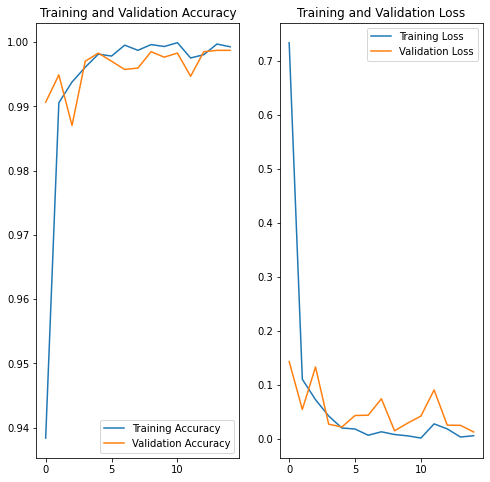

In [111]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss=history.history['loss']
val_loss=history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()
